## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [55]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [56]:
# Random state seed
rseed = 42

## Load and explore data

In [57]:
# Import the dataset

country_df = pd.read_csv('Country-data.csv')

In [58]:
# Check the shape

print(country_df.shape)

(167, 10)


In [59]:
# Check datatypes & counts

print(country_df.dtypes)
print(country_df.count())

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object
country       167
child_mort    167
exports       167
health        167
imports       167
income        167
inflation     167
life_expec    167
total_fer     167
gdpp          167
dtype: int64


In [60]:
# Get descriptive statistics

print(country_df.info())
print(country_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.

In [61]:
# Identify any missing data

print(country_df.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


## Preprocessing and Feature Selection

In [62]:
# Drop any non-numeric features (columns)

df = country_df.select_dtypes(include=[float, int])

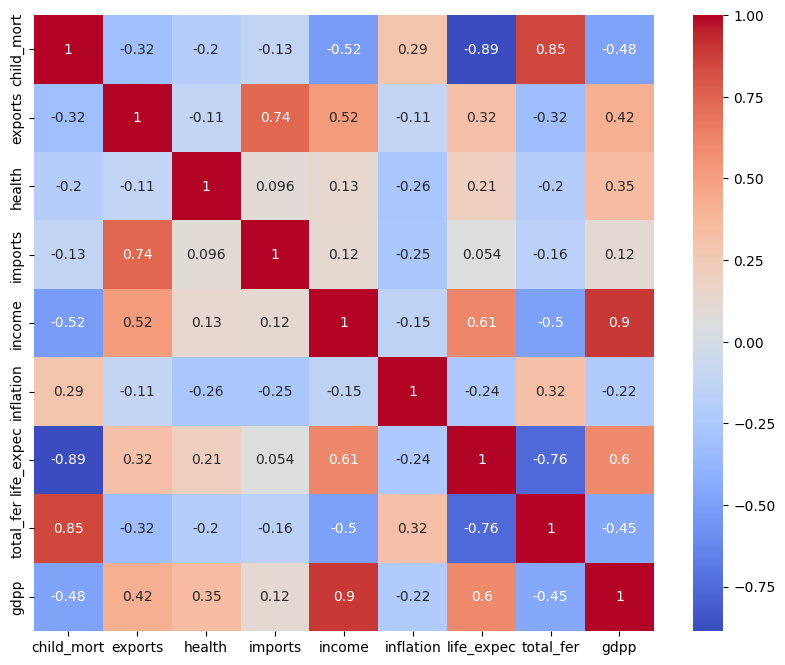

In [63]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

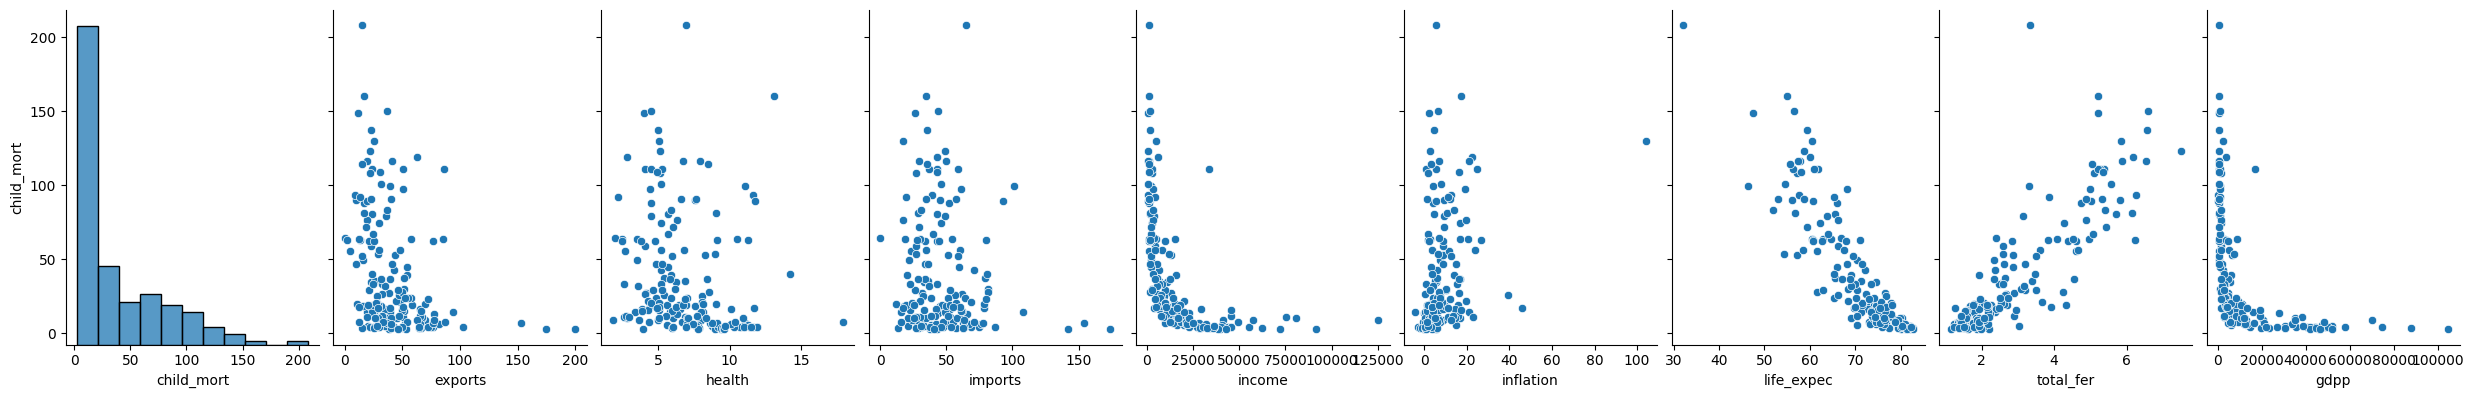

In [64]:
# Explore the continuous independent features against child_mort using scatter plots.

sns.pairplot(df, x_vars=df.columns, y_vars='child_mort', height=4, aspect=0.7)
plt.show()


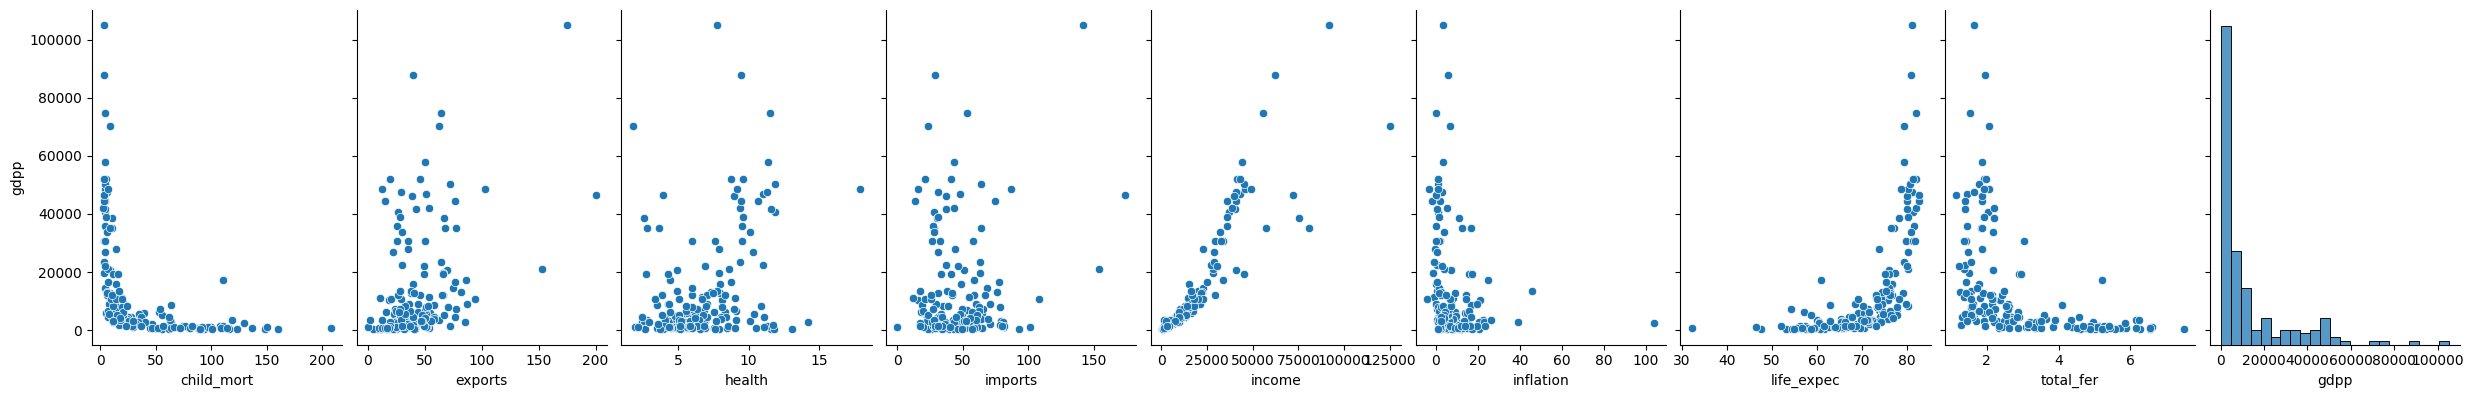

In [65]:
# Explore the continuous independent features against gdpp using scatter plots.

sns.pairplot(df, x_vars=df.columns, y_vars='gdpp', height=4, aspect=0.7)
plt.show()


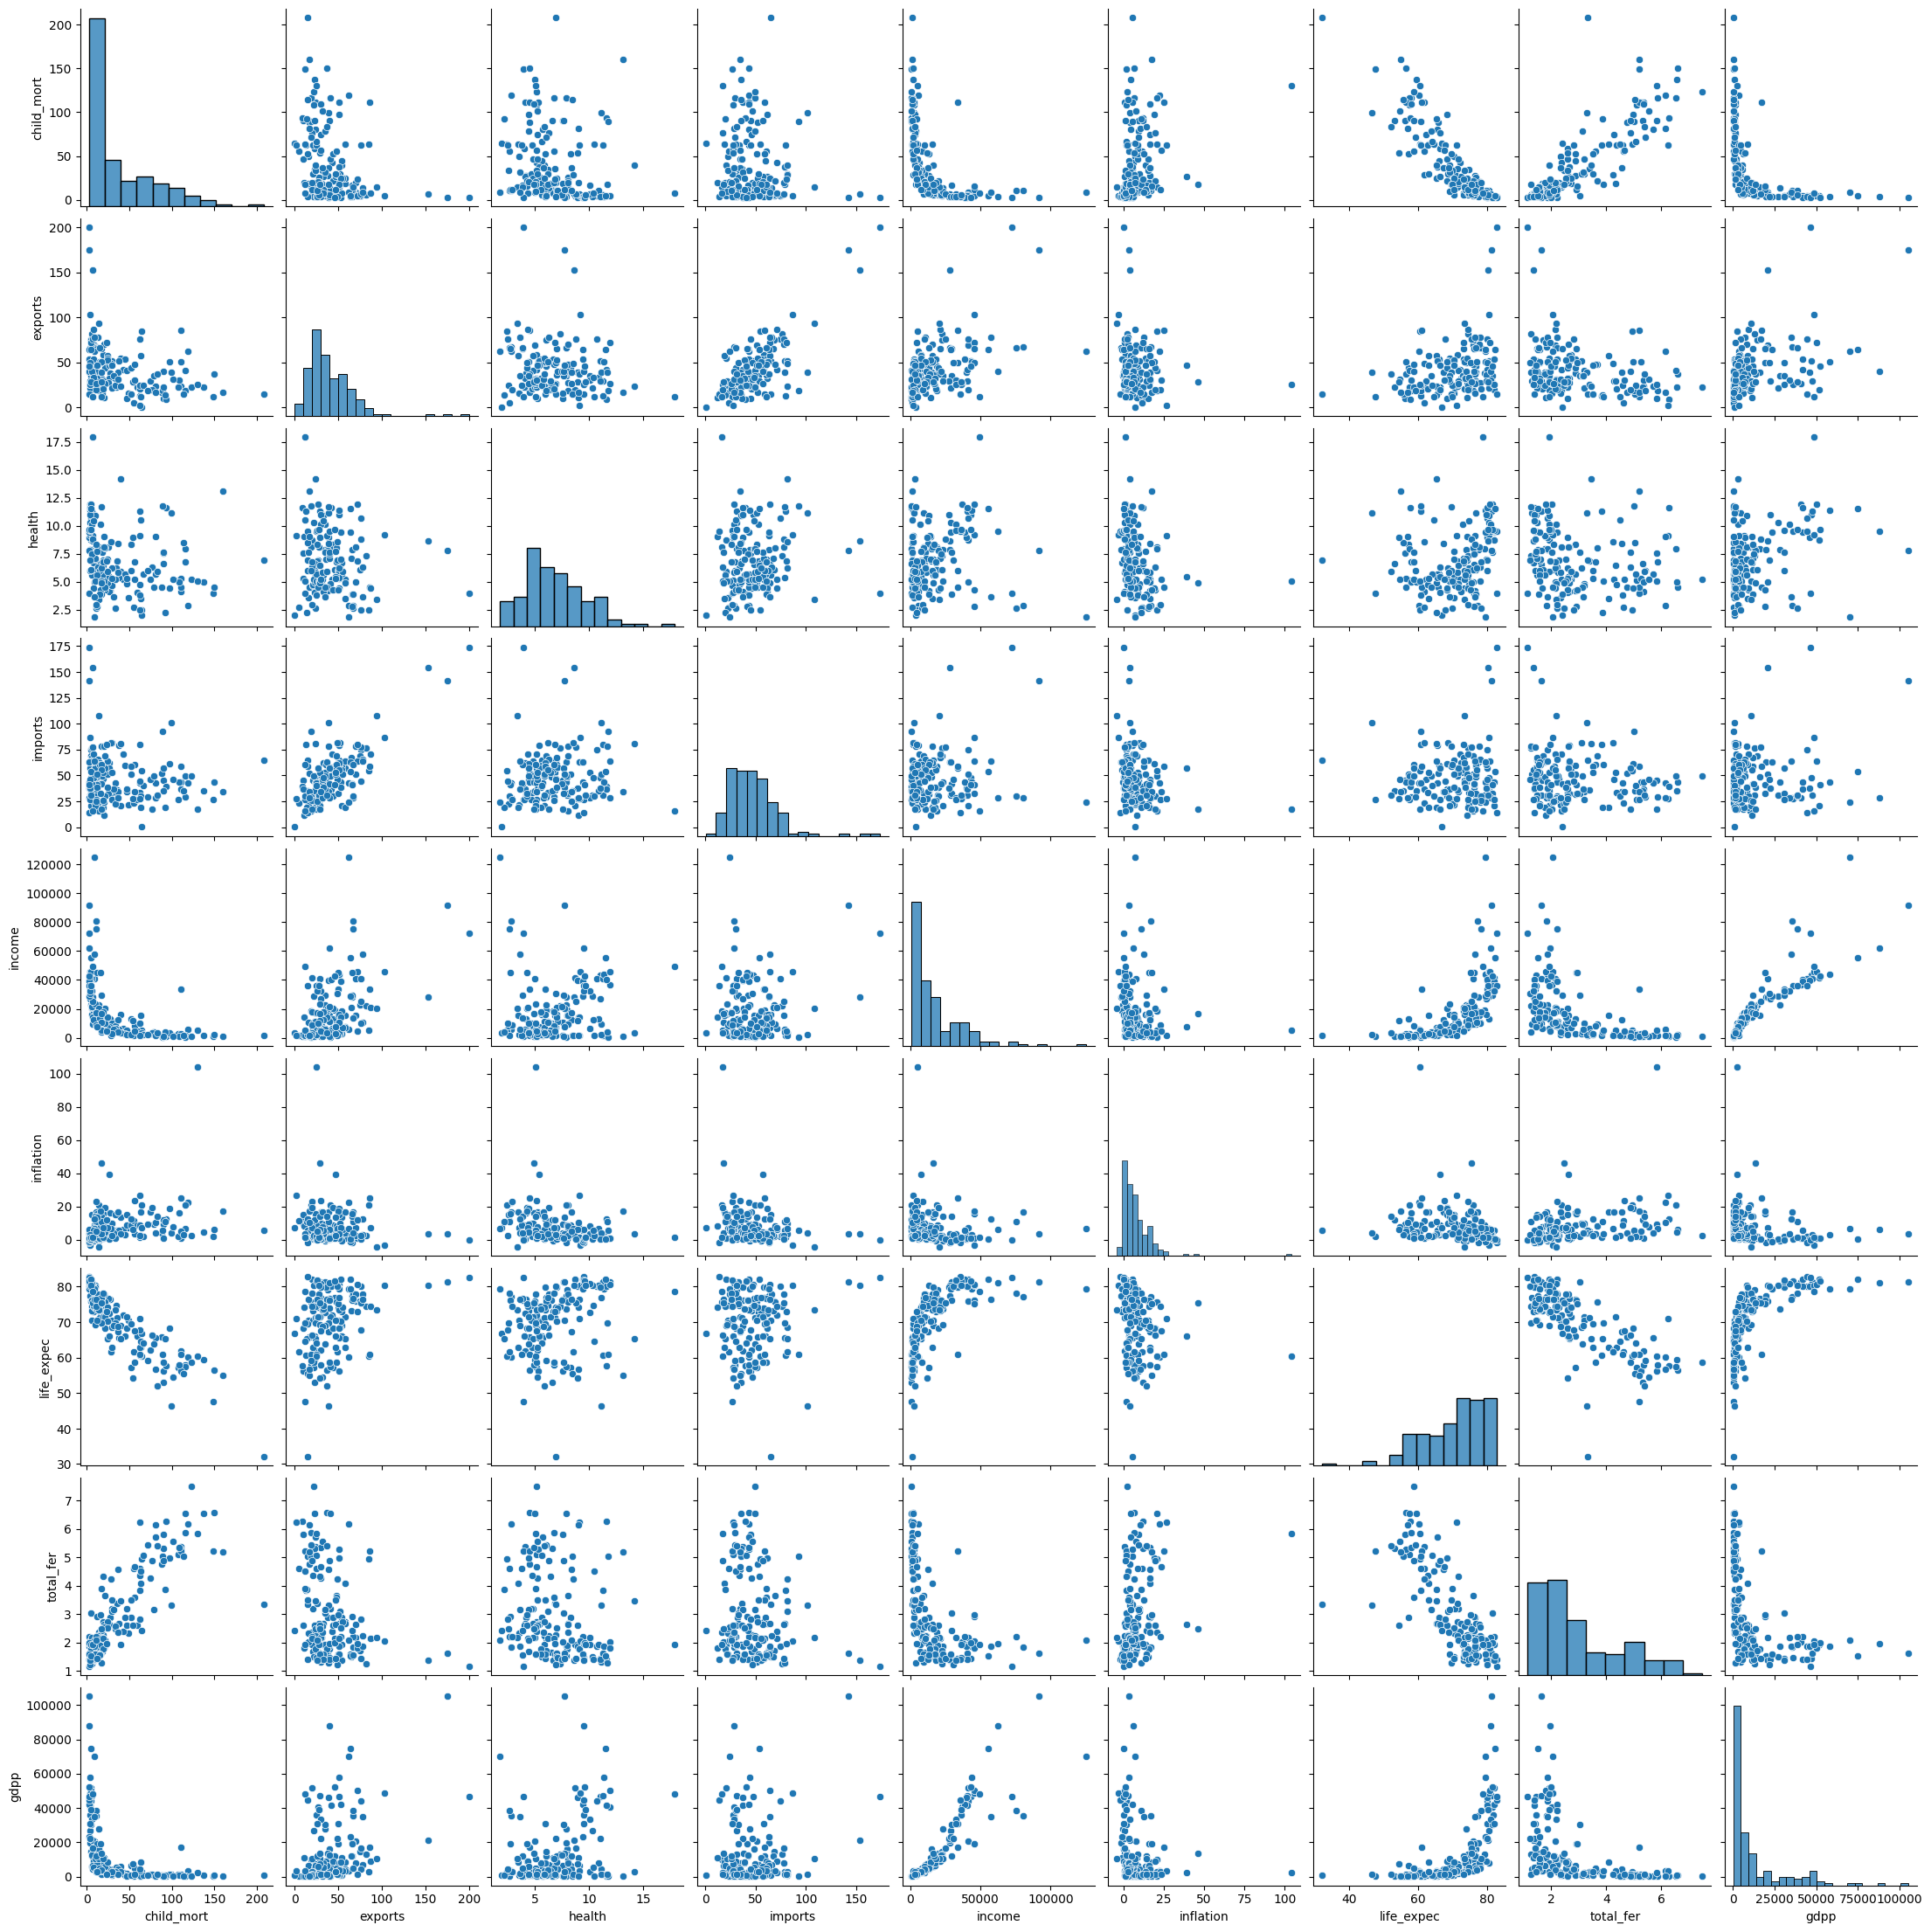

In [66]:
# Create a pair plot
# Hint: Explore seaborn pairplot

sns.pairplot(df)
plt.show()


Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

### Scaling the Data

In [67]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## K-Means Clustering

### Selecting K

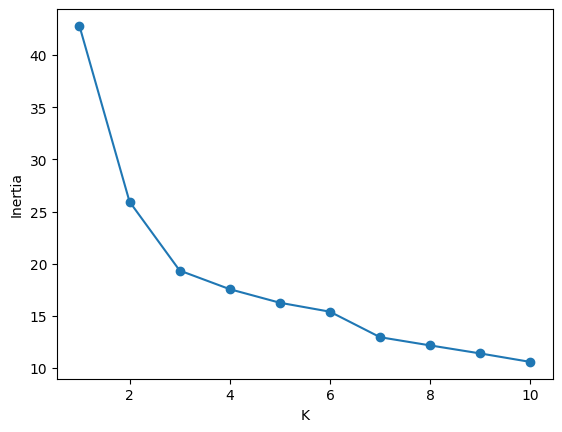

None


In [68]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

    # Plot elbow curve using scaled dataset
print(elbow_Kmeans(df_scaled, max_k=10, r=42))

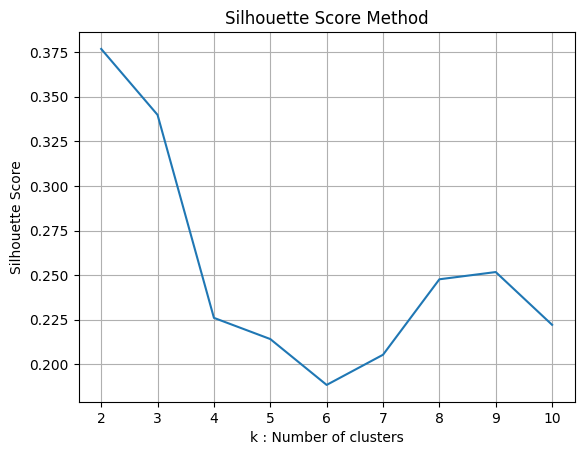

In [69]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method choose a value for K.

Silhouette score closest to 1 is the best score, so best K value is 2.

## Fitting a K-Means Model with the selected K value

In [70]:
# Remember to set the random_state to rseed

kmeans_model = KMeans(n_clusters=2, random_state=rseed, max_iter=500)


In [71]:
# Count the number of records in each cluster

df_scaled['Cluster'] = kmeans_model.fit_predict(df_scaled)
print(df_scaled['Cluster'].value_counts())


Cluster
1    112
0     55
Name: count, dtype: int64


In [76]:
# Check model performance with the silhouette coefficient

score = silhouette_score(df_scaled.drop('Cluster', axis=1), df_scaled['Cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.37671430588173554


## Predictions

In [77]:
# Add the predicted cluster label column to the original dataframe

df['Cluster'] = df_scaled['Cluster']
print(df.head())


   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  Cluster  
0       5.82    553        0  
1       1.65   4090        1  
2       2.89   4460        1  
3       6.16   3530        0  
4       2.13  12200        1  


## Visualisation of clusters

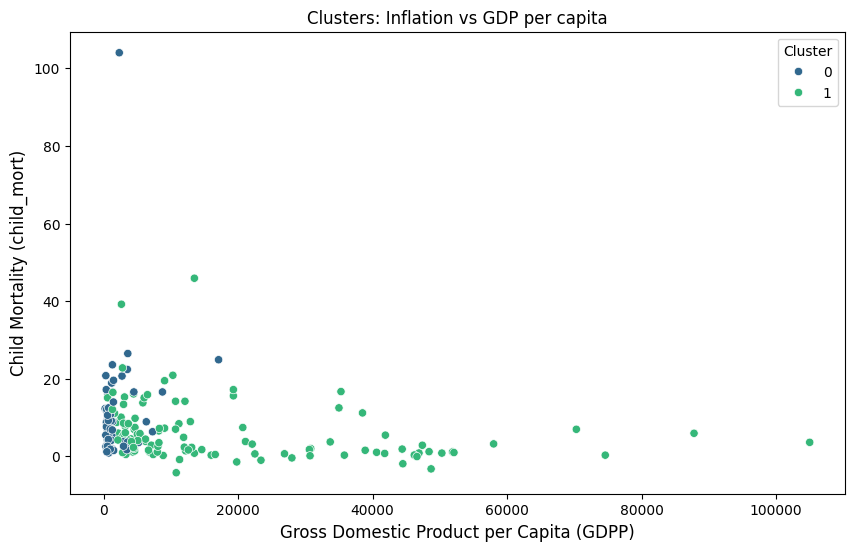

In [89]:
# Visualisation of clusters: child mortality vs gdpp


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gdpp', y='inflation', hue='Cluster', palette='viridis')
plt.ylabel('Child Mortality (child_mort)', fontsize=12)
plt.xlabel('Gross Domestic Product per Capita (GDPP)', fontsize=12)
plt.title('Clusters: Inflation vs GDP per capita')
plt.show()




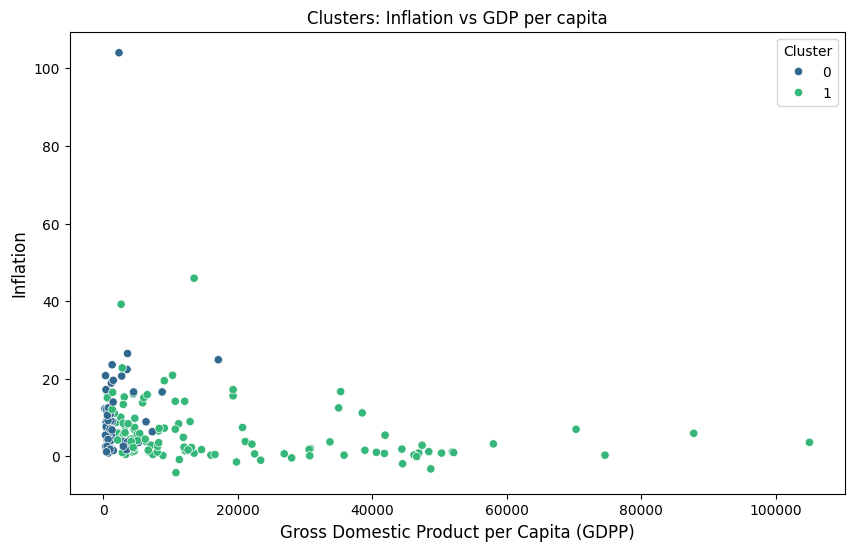

In [81]:
# Visualisation of clusters: inflation vs gdpp

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gdpp', y='inflation', hue='Cluster', palette='viridis')
plt.ylabel('Inflation', fontsize=12)
plt.xlabel('Gross Domestic Product per Capita (GDPP)', fontsize=12)
plt.title('Clusters: Inflation vs GDP per capita')
plt.show()

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**

In [90]:
# Assuming we label clusters as follows:
# Cluster 0: Undeveloped
# Cluster 1: Developed

# Add labels to the dataset
labels_map = {0: 'Undeveloped', 1: 'Developed'}
df_scaled['Development Status'] = df_scaled['Cluster'].map(labels_map)

# Justification for labels:
# - Undeveloped: High child mortality, low GDPP, high inflation
# - Developed: Low child mortality, high GDPP, low inflation

# Display the labeled data
print(df_scaled[['child_mort', 'gdpp', 'inflation', 'Development Status']])

     child_mort      gdpp  inflation Development Status
0      0.426485  0.003073   0.126144        Undeveloped
1      0.068160  0.036833   0.080399          Developed
2      0.120253  0.040365   0.187691          Developed
3      0.566699  0.031488   0.245911        Undeveloped
4      0.037488  0.114242   0.052213          Developed
..          ...       ...        ...                ...
162    0.129503  0.026143   0.063118        Undeveloped
163    0.070594  0.126650   0.463081          Developed
164    0.100779  0.010299   0.150725          Developed
165    0.261441  0.010299   0.257000        Undeveloped
166    0.391918  0.011731   0.168284        Undeveloped

[167 rows x 4 columns]
